In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
from astropy.io import fits

In [4]:
def get_spectra_srcid(spec_folder='./', suffix='.ftz'):
    """Get source ids of all available spectra."""
    spec_folder = Path(spec_folder)
    spec_files = spec_folder.glob(f'*{suffix}')
    src_ids = [
        str(spec).split('_')[0] for spec in spec_files if spec.is_file()]
    return src_ids

In [5]:
def extract_spectra(spec_file, bg_file=None):
    """Extract spectra from the specfile."""
    if not Path(spec_file).is_file():
        return None

    src_id = str(Path(spec_file).name).split('_')[0]
    # print(src_id)
    specdir_path = Path(spec_file).parent
    with fits.open(spec_file) as hdu_list:
        spectra = hdu_list[1].data['COUNTS']
        spec_exp = float(hdu_list[1].header['EXPOSURE'])
        spec_bscal = float(hdu_list[1].header['BACKSCAL'])

    if bg_file is None:
        bg_file = f"{specdir_path / hdu_list[1].header['BACKFILE']}"

    if not Path(bg_file).is_file():
        print('BACKFILE needs to be changed. Using backup namestyle')
        bg_file = f"{specdir_path / f'{Path(spec_file).name}'.split('src')[0]}bkg_grp.ds"
        if not Path(bg_file).is_file():
            print(f'File {bg_file} does not exist. Check')
            return 0

    with fits.open(bg_file) as hdu_list:
        bg_spec = hdu_list[1].data['COUNTS']
        bg_exp = float(hdu_list[1].header['EXPOSURE'])
        bg_bscal = float(hdu_list[1].header['BACKSCAL'])

    
    return src_id, spectra - bg_spec*spec_bscal/bg_bscal*spec_exp/bg_exp

In [6]:
def load_all_spectra(folder='./', detector='PN'):
    """Load all spectra."""
    if not Path(folder).is_dir():
        return None
    
    specdir = Path(folder)
    spec_files = list(specdir.glob(f'*_{detector}_combined_src_grp.ds'))
    print('# of PN spectra: ', len(spec_files))
    pn_spectra = np.zeros((len(spec_files), 4096), dtype=float)
    pn_srcids = np.zeros(len(spec_files), dtype='<U21')
    for i, specfile in enumerate(spec_files):
        if not specfile.is_file():
            continue
        pn_srcids[i], pn_spectra[i] = extract_spectra(specfile)
        
        if i % 1000 == 0:
            print(f'Finished loading {i} specta')
            print(pn_srcids[i])
    return pn_srcids, pn_spectra

In [7]:
def match_id_name(xmm_catalog, delimeter, src_ids=None, names=None):
    """Match SRC_IDs and XMM IAU names from catalogs."""
    xmm_data = pd.read_table(xmm_catalog, delimiter=delimeter)
    xmm_names = np.array(xmm_data['IAUNAME'])
    xmm_srcids = np.array(xmm_data['SRCID']).astype('<U21')
    name_id_dict = dict(zip(xmm_names, xmm_srcids))
    id_name_dict = dict(zip(xmm_srcids, xmm_names))

    if src_ids is None and names is None:
        return name_id_dict, id_name_dict

    if src_ids is not None:
        names_of_ids = [id_name_dict.get(src_id, None) for src_id in src_ids]
    else:
        names_of_ids = None

    if names is not None:
        ids_of_names = [name_id_dict.get(name, None) for name in names]
    else:
        ids_of_names = None

    return names_of_ids, ids_of_names

In [8]:
def get_class(class_catalog_df, xmm_catalog, src_ids, delimiter):
    """Get src class of all_src_ids"""
    all_names = np.array(class_catalog_df['name'])
    all_classes = np.array(class_catalog_df['Class'])
    src_names = match_id_name(xmm_catalog, delimiter, src_ids)[0]
    classes = np.zeros(len(src_ids), dtype='<U10')
    for i, name in enumerate(src_names):
        if name in all_names:
            print(name)
            classes[i] = all_classes[all_names==name].astype('<U10')[0]
    
    return classes

In [9]:
allpn_srcids, allpn_spectra = load_all_spectra('../Data/XMM_combined_spectra/')

# of PN spectra:  131945
Finished loading 0 specta
200001101010001
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Us

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 3000 specta
200521402010031
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
B

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 5000 specta
200823401010036
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
B

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 21000 specta
201371602010022
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

Finished loading 34000 specta
202052401010045
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 40000 specta
203055903010006
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 47000 specta
205003001010072
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 48000 specta
205020201010019
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 54000 specta
205532304010003
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 56000 specta
205562801010051
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 62000 specta
206505107010058
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 70000 specta
206735502015131
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 77000 specta
206931809010015
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 83000 specta
207238005010068
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
Finished loading 90000 specta
207451201010068
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 94000 specta
207629206010014
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 96000 specta
207650808010013
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 99000 specta
207840608010007
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle


BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 102000 specta
208009710010010
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 112000 specta
208270307010059
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 113000 specta
208272202010031
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 123000 specta
208650503010008
BACKFILE needs to be changed. Using backup namestyle

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 124000 specta
208723909010079
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
Finished loading 126000 specta
208830401010041
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup namestyle
BACKFILE needs to be changed. Using backup nam

In [10]:
import pandas as pd

In [11]:
training_catalog = pd.read_csv('../Data/XMMTrainingDataset.csv')

In [12]:
all_src_classes = get_class(training_catalog, '../Data/Catalogs/4XMM_DR14_clean_src_detinfo.csv', allpn_srcids, ',')

4XMM J041942.1+555957
4XMM J041959.0+561329
4XMM J125325.9+101249
4XMM J125400.9+101112
4XMM J110918.4-774739
4XMM J114343.3+200557
4XMM J114312.1+200346
4XMM J114227.9+200955
4XMM J140017.3-612851
4XMM J162809.9+393212
4XMM J170206.5-295644
4XMM J214041.4-234718
4XMM J213922.9-234915
4XMM J214018.0-234919
4XMM J051523.8+005646
4XMM J222905.2+611407
4XMM J072001.8+711516
4XMM J223417.9-375923
4XMM J131047.5+321815
4XMM J130920.9+322706
4XMM J223621.7+334850
4XMM J150626.6+014701
4XMM J150724.2+012903
4XMM J131032.1+273602
4XMM J131122.2+271543
4XMM J073245.8+855212
4XMM J180756.9-192356
4XMM J083838.4+253617
4XMM J012412.5+033720
4XMM J012401.1+033949
4XMM J012454.5+035809
4XMM J160318.0+430116
4XMM J160251.3+430223
4XMM J132531.8+301714
4XMM J103023.2+682528
4XMM J153438.2+553945
4XMM J153458.8+553359
4XMM J101850.4+411507
4XMM J101843.1+413516
4XMM J101857.5+412548
4XMM J120858.0+454035
4XMM J120802.4+453755
4XMM J120819.6+453137
4XMM J163255.5+373459
4XMM J121628.4+361605
4XMM J1315

4XMM J033528.6-254421
4XMM J100529.5-702324
4XMM J111715.9+175741
4XMM J111757.6+180832
4XMM J111645.5+175847
4XMM J111703.6+174441
4XMM J110403.0+375949
4XMM J004406.1+850608
4XMM J003221.2+851838
4XMM J102310.0+194248
4XMM J134831.7-302123
4XMM J032604.2+484807
4XMM J032528.6+485751
4XMM J032512.3+485205
4XMM J053838.2-023638
4XMM J053853.1-024353
4XMM J053827.7-024300
4XMM J053820.2-023801
4XMM J042321.9+144826
4XMM J042406.2+143921
4XMM J042206.4+280949
4XMM J042225.6+281233
4XMM J045548.2+302016
4XMM J045632.1+302325
4XMM J045647.9+302932
4XMM J015957.5+003310
4XMM J134442.0+555312
4XMM J134512.0+554759
4XMM J134440.2+555648
4XMM J134447.4+555411
4XMM J113116.2+311621
4XMM J113042.5+311228
4XMM J005802.6-361201
4XMM J020845.4+650214
4XMM J144404.5+291412
4XMM J144549.1+291108
4XMM J144523.1+291054
4XMM J063130.0+103233
4XMM J082722.2+263635
4XMM J082651.4+263721
4XMM J095309.2+075536
4XMM J172259.2-371206
4XMM J161706.9+122606
4XMM J141513.8+440318
4XMM J084742.4+344504
4XMM J0846

4XMM J022634.6-041133
4XMM J022630.8-041326
4XMM J022522.8-042647
4XMM J022545.0-043735
4XMM J022617.8-043909
4XMM J083539.2-424831
4XMM J104924.9-594944
4XMM J102705.8-434341
4XMM J120943.2+393642
4XMM J095531.4+174340
4XMM J074118.8+311434
4XMM J023853.4-521909
4XMM J150439.3+102523
4XMM J031547.5-552902
4XMM J174931.7-280804
4XMM J011911.4-104531
4XMM J193214.0+105933
4XMM J193205.9+110413
4XMM J193126.3+105658
4XMM J165410.2+153724
4XMM J075647.8-605649
4XMM J053923.5-284222
4XMM J053929.4-284859
4XMM J053949.9-283832
4XMM J053943.0-282719
4XMM J053958.7-283707
4XMM J075040.6-674347
4XMM J181456.7-172101
4XMM J183328.2-102408
4XMM J074352.9+744257
4XMM J074435.6+744443
4XMM J074244.0+743249
4XMM J074248.7+742747
4XMM J105336.3+573800
4XMM J105303.7+572924
4XMM J105252.7+572859
4XMM J105228.3+573104
4XMM J105225.8+571906
4XMM J105130.4+572218
4XMM J005030.8-520010
4XMM J005009.6-515932
4XMM J005030.8-520047
4XMM J122257.9+751934
4XMM J122110.5+751119
4XMM J122119.8+751618
4XMM J1223

4XMM J132653.9+073932
4XMM J132558.0+073624
4XMM J012158.6+034943
4XMM J023234.4-073103
4XMM J023108.4-071823
4XMM J023137.5-072854
4XMM J023224.8-071910
4XMM J021043.1-001818
4XMM J021027.9-002308
4XMM J021013.6-001200
4XMM J032837.5+025755
4XMM J041401.0+111441
4XMM J041307.4+111610
4XMM J091027.0+542056
4XMM J091059.4+541716
4XMM J090941.9+541940
4XMM J091029.0+541526
4XMM J102527.1+470320
4XMM J102506.4+470048
4XMM J102450.0+471809
4XMM J102355.3+471504
4XMM J012539.3+322309
4XMM J012620.6+320143
4XMM J030604.7-001529
4XMM J214303.3+065417
4XMM J214459.7+280716
4XMM J103947.0-050657
4XMM J094446.3+040659
4XMM J092314.3+510020
4XMM J094240.9+480017
4XMM J094417.6+481204
4XMM J160054.6-514705
4XMM J054631.0+002534
4XMM J054707.2+001932
4XMM J054704.9+001831
4XMM J054644.0+001803
4XMM J054656.5+002052
4XMM J054709.7+002235
4XMM J054712.9+002840
4XMM J054710.9+001914
4XMM J054710.3+001722
4XMM J054642.2+001208
4XMM J054715.8+002320
4XMM J054658.1+002759
4XMM J054659.0+002457
4XMM J2239

4XMM J062653.7-533455
4XMM J151132.8-211836
4XMM J130656.2-403523
4XMM J060631.6+290037
4XMM J055603.7+395951
4XMM J154011.1+360132
4XMM J143122.4+280740
4XMM J092345.2+512711
4XMM J092140.9+512548
4XMM J092142.5+513148
4XMM J133229.0+291223
4XMM J232831.8+033627
4XMM J083905.4+511832
4XMM J130940.6+573309
4XMM J130955.2+573404
4XMM J131021.6+572533
4XMM J171029.4+590834
4XMM J171126.9+585544
4XMM J171157.2+591222
4XMM J042145.3+192846
4XMM J102945.4+293044
4XMM J105010.7-140437
4XMM J120733.2+280648
4XMM J120629.2+281435
4XMM J131119.4+313920
4XMM J131049.8+315702
4XMM J192123.5+434616
4XMM J124058.0-015919
4XMM J124049.1-015522
4XMM J124120.1-020715
4XMM J163023.5+242546
4XMM J005717.8-271830
4XMM J005814.0-272549
4XMM J005748.2-271725
4XMM J005811.4-272634
4XMM J005818.1-272848
4XMM J231830.9+425539
4XMM J100125.2+012820
4XMM J134844.0-035324
4XMM J150152.8+014837
4XMM J023932.8-342524
4XMM J023939.0-343221
4XMM J000020.1-322101
4XMM J003005.7+261726
4XMM J100325.1+325306
4XMM J0856

4XMM J092143.9+063309
4XMM J092214.0+063822
4XMM J092143.5+063644
4XMM J183007.3+004824
4XMM J101144.1+294506
4XMM J045224.4-131612
4XMM J015354.9-090201
4XMM J155649.4+221601
4XMM J053852.3-072109
4XMM J053927.1-072614
4XMM J053958.7-073112
4XMM J054149.7-080032
4XMM J054154.6-075912
4XMM J054117.8-074952
4XMM J054205.5-080105
4XMM J054225.7-080849
4XMM J054207.9-081202
4XMM J054247.3-080404
4XMM J054107.0-074716
4XMM J054013.7-073216
4XMM J054105.4-074708
4XMM J054258.3-083742
4XMM J054256.4-083746
4XMM J053650.1-064128
4XMM J053732.4-063905
4XMM J053747.0-064229
4XMM J053741.6-063933
4XMM J053429.4-061955
4XMM J053527.9-061414
4XMM J053453.9-061052
4XMM J084358.1+425036
4XMM J084453.6+425743
4XMM J074707.6+305414
4XMM J074533.8+310122
4XMM J100155.2+324006
4XMM J112053.9+670603
4XMM J010933.4+140007
4XMM J124955.4+051627
4XMM J124937.2+050804
4XMM J125017.1+051832
4XMM J073521.2+264744
4XMM J073508.9+265126
4XMM J073445.0+264315
4XMM J102320.2+440509
4XMM J102341.6+434743
4XMM J1023

4XMM J103111.0-345406
4XMM J201852.9+404632
4XMM J172023.9+411513
4XMM J172126.2+410404
4XMM J144103.6+534105
4XMM J143959.6+533757
4XMM J144211.6+533608
4XMM J225303.0-405747
4XMM J023743.4-193233
4XMM J213750.0-204231
4XMM J085654.9-322208
4XMM J171456.0+593659
4XMM J171633.2+590751
4XMM J171539.2+585152
4XMM J171335.1+584755
4XMM J171316.2+584005
4XMM J171233.4+583610
4XMM J171133.5+584056
4XMM J171117.6+584123
4XMM J171234.8+600530
4XMM J171145.5+601318
4XMM J171231.5+600719
4XMM J171450.5+601409
4XMM J171521.8+601647
4XMM J171651.5+603235
4XMM J171228.1+583906
4XMM J210604.5-522244
4XMM J173059.1+061228
4XMM J184612.7-022228
4XMM J184650.6-022907
4XMM J184815.3+004733
4XMM J111510.1+001109
4XMM J123501.7-001714
4XMM J142317.9-000108
4XMM J074719.8+182226
4XMM J112054.0+025223
4XMM J112141.2+023718
4XMM J112148.0+024059
4XMM J113304.4+561029
4XMM J113300.4+560819
4XMM J122719.8+092303
4XMM J122624.7+092502
4XMM J124400.0+131224
4XMM J151526.1+415612
4XMM J151353.1+420106
4XMM J1444

4XMM J113916.1+193518
4XMM J022744.8+585147
4XMM J022438.4+184959
4XMM J162544.9+390753
4XMM J162623.0+390006
4XMM J162701.3+385035
4XMM J162646.0+390054
4XMM J162629.5+385342
4XMM J162539.5+393450
4XMM J204334.9+353533
4XMM J045848.4+524413
4XMM J012744.6-524804
4XMM J221436.1-171008
4XMM J143701.9-595901
4XMM J072856.0+333816
4XMM J072837.6+334617
4XMM J072909.4+334813
4XMM J112556.5+143151
4XMM J112607.2+143722
4XMM J123132.3+013814
4XMM J123049.0+013555
4XMM J123209.5+013634
4XMM J123051.6+014029
4XMM J103617.9-670917
4XMM J103527.5-672013
4XMM J205114.9-523726
4XMM J162042.2+293907
4XMM J022642.0-414423
4XMM J231210.3+033359
4XMM J122001.9-031154
4XMM J121932.8-032706
4XMM J234100.8-085531
4XMM J150046.2+212918
4XMM J150019.3+212827
4XMM J145945.8+212129
4XMM J150043.7+212839
4XMM J011153.4-455845
4XMM J111637.2+013249
4XMM J111635.0+012415
4XMM J111647.2+012635
4XMM J111644.5+012136
4XMM J172134.8+320653
4XMM J135834.7+370904
4XMM J163750.3+322314
4XMM J232816.4-105345
4XMM J0830

4XMM J201618.5+370925
4XMM J201546.6+371532
4XMM J201622.7+370710
4XMM J201543.3+372432
4XMM J004142.5-085703
4XMM J151623.3+063713
4XMM J153938.2+060119
4XMM J153950.2+060555
4XMM J090355.2+132110
4XMM J212355.0-005843
4XMM J212325.2-004507
4XMM J212245.7-005008
4XMM J010523.7-002538
4XMM J010550.4-001254
4XMM J010529.6-001104
4XMM J010518.5-001036
4XMM J010618.7-002203
4XMM J010737.0-001911
4XMM J010843.7-001859
4XMM J010514.5+000226
4XMM J010828.5+000305
4XMM J011129.9+003431
4XMM J011124.4+002647
4XMM J010950.0+002332
4XMM J010443.9+002854
4XMM J011339.4-003009
4XMM J011539.7-002159
4XMM J011801.0-002945
4XMM J011652.0-000615
4XMM J011516.2-000440
4XMM J011254.8+000313
4XMM J011633.7+000625
4XMM J012206.6-003043
4XMM J012051.0-002639
4XMM J012136.8-001810
4XMM J012240.1-003239
4XMM J012750.8-001346
4XMM J012734.6-000522
4XMM J012658.8+000247
4XMM J012301.7+000323
4XMM J012256.2-000253
4XMM J012239.0+000529
4XMM J012309.1+003307
4XMM J013107.4-001031
4XMM J013358.2-001540
4XMM J0134

4XMM J145431.1+031555
4XMM J145459.6+031143
4XMM J145454.6+033534
4XMM J122034.5-360145
4XMM J090350.6+521530
4XMM J114214.8+053936
4XMM J163106.3+395215
4XMM J162901.3+400759
4XMM J163012.1+401304
4XMM J163038.3+401553
4XMM J162548.9+400043
4XMM J162714.1+394444
4XMM J193938.8-634223
4XMM J211422.4+543959
4XMM J201746.0-161416
4XMM J041802.0+181522
4XMM J041750.7+182829
4XMM J041833.9+182150
4XMM J035501.3+162457
4XMM J045033.9+150459
4XMM J022635.6+373547
4XMM J022554.9+373405
4XMM J044830.8+162317
4XMM J042239.7+181609
4XMM J042254.0+182518
4XMM J035541.2+183315
4XMM J113015.2+055447
4XMM J154542.7+505758
4XMM J154530.9+504705
4XMM J092237.2+311019
4XMM J092219.1+310753
4XMM J053135.3+331256
4XMM J053130.6+331019
4XMM J053220.7+330924
4XMM J053235.8+331427
4XMM J053141.6+330632
4XMM J010102.8+275449
4XMM J005905.7+280256
4XMM J010038.2+275443
4XMM J114809.6+012037
4XMM J114840.2+012222
4XMM J114808.1+013812
4XMM J143405.9+485955
4XMM J165338.0-015837
4XMM J123701.5+120054
4XMM J1018

4XMM J042930.0+223915
4XMM J100858.3+380219
4XMM J152451.1+295610
4XMM J152342.1+300501
4XMM J123039.6+104348
4XMM J123050.4+103859
4XMM J121224.9+272248
4XMM J121304.9+273626
4XMM J112449.0+213607
4XMM J112425.5+214156
4XMM J002029.8+250825
4XMM J022034.4+212406
4XMM J022139.5+211630
4XMM J022208.8+211616
4XMM J135842.3+281440
4XMM J140008.0+275132
4XMM J111250.5+404548
4XMM J111154.1+404508
4XMM J142234.4+371743
4XMM J142136.3+371129
4XMM J142155.3+372328
4XMM J142129.9+370809
4XMM J192623.0+483152
4XMM J192715.3+483242
4XMM J154602.6+362231
4XMM J154500.3+355740
4XMM J185627.3+380227
4XMM J045420.3-031459
4XMM J033115.0-275518
4XMM J033122.1-275755
4XMM J033136.2-280148
4XMM J033244.1-281028
4XMM J033349.7-282243
4XMM J033329.2-275926
4XMM J033320.0-275911
4XMM J033402.3-280609
4XMM J033614.8-281244
4XMM J003938.1-433756
4XMM J002107.0+284749
4XMM J002045.5+282827
4XMM J122859.3+114725
4XMM J122915.9+115232
4XMM J123025.2+114655
4XMM J112912.2+235219
4XMM J112842.3+234705
4XMM J1428

In [13]:
np.where(all_src_classes != None)

(array([     0,      1,      2, ..., 131942, 131943, 131944]),)

In [11]:
allpn_srcids

array(['200001101010001', '200001101010002', '200001101010003', ...,
       '209322009010002', '209322009010004', '209322009010005'],
      dtype='<U21')

In [35]:
x

array(['', '', 'x', '', '', '', '', '', '', ''], dtype='<U1')

In [36]:
ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
ls: .: No such file or directory


In [37]:
allpn_srcids

array(['2', '2', '2', ..., '2', '2', '2'], dtype='<U1')

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

In [55]:

class BaselineCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BaselineCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=8, kernel_size=7, padding=3)
        self.bn1 = nn.BatchNorm1d(8)
        self.pool1 = nn.MaxPool1d(2)  # 380 → 190

        self.conv2 = nn.Conv1d(8, 16, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(16)
        self.pool2 = nn.MaxPool1d(2)  # 190 → 95

        # final feature size = 16 * 95 = 1520
        self.fc1 = nn.Linear(16 * 95, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

In [17]:

class BaselineCNN2(nn.Module):
    def __init__(self, num_classes=4):
        super(BaselineCNN2, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=15, padding=7)
        self.bn1 = nn.BatchNorm1d(16)
        self.pool1 = nn.MaxPool1d(2)  # 380 → 190

        self.conv2 = nn.Conv1d(16, 32, kernel_size=11, padding=5)
        self.bn2 = nn.BatchNorm1d(32)
        self.pool2 = nn.MaxPool1d(2)  # 190 → 95

        # final feature size = 16 * 95 = 1520
        self.fc1 = nn.Linear(32 * 95, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

In [18]:
allpn_spec_labelled = allpn_spectra[np.where(np.logical_or(
    np.logical_or(all_src_classes == 'AGN', all_src_classes == 'LM-STAR'),
    all_src_classes == 'HM-STAR'))]

In [19]:
len(allpn_spec_labelled)

3706

In [20]:
src_classes_simp = np.full(len(all_src_classes), np.nan)

In [21]:
for i, srctype in enumerate(all_src_classes):
    if srctype == 'AGN':
        src_classes_simp[i] = 0
    elif srctype == 'HM-STAR' or srctype == 'LM-STAR':
        src_classes_simp[i] = 1

In [22]:
src_classes_labelled = src_classes_simp[~np.isnan(src_classes_simp)].astype(int)
allpn_spec_labelled = allpn_spectra[~np.isnan(src_classes_simp)]

In [70]:
allpn_spec_unlabelled = allpn_spectra[np.isnan(src_classes_simp)]
allpn_spec_unlabelled_rebinned = rebin_spectra(allpn_spec_unlabelled)
allpn_spec_unlabelled_norm = (allpn_spec_unlabelled_rebinned.transpose() /
                              np.sum(allpn_spec_unlabelled_rebinned, axis=1)).transpose()
print(allpn_spec_unlabelled_norm.shape)

(128239, 380)


In [71]:
brightpn_args_un = np.where(np.sum(allpn_spec_unlabelled_rebinned, axis=1) > 100)
brightpn_spec_unlabelled_rebinned = allpn_spec_unlabelled_rebinned[brightpn_args_un]
brightpn_spec_unlabelled_norm = allpn_spec_unlabelled_norm[brightpn_args_un]
print(brightpn_spec_unlabelled_norm.shape)

(58322, 380)


In [23]:
import matplotlib.pyplot as plt

In [24]:
len(np.where(src_classes_labelled == 1)[0])

1624

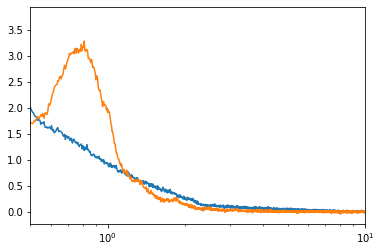

In [25]:
en_approx = np.linspace(0, 20.48, 4096)
plt.plot(en_approx, np.mean(allpn_spec_labelled[src_classes_labelled == 0], axis=0))
plt.plot(en_approx, np.mean(allpn_spec_labelled[src_classes_labelled == 1], axis=0))
plt.xlim(0.5, 10.0)
plt.xscale('log')

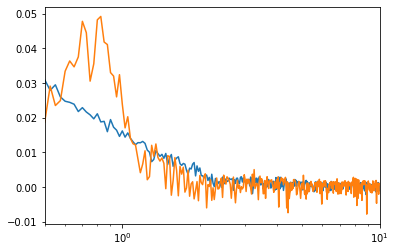

In [31]:
en_approx = np.linspace(0.5, 10.0, 380)
plt.plot(en_approx, np.mean(allpn_spec_labelled_norm[src_classes_labelled == 0], axis=0))
plt.plot(en_approx, np.mean(allpn_spec_labelled_norm[src_classes_labelled == 1], axis=0))
plt.xlim(0.5, 10.0)
plt.xscale('log')

In [27]:
def rebin_spectra(spectra, start=96, end=2000, bin_size=5):
    """Rebins spectra from [start:end] by summing every bin_size bins."""
    spectra_slice = spectra[:, start:end]  # shape: (N, 1905)
    n_samples = spectra.shape[0]
    
    # Reshape to (N, num_groups, bin_size)
    reshaped = spectra_slice[:, : (end - start) // bin_size * bin_size]
    rebinned = reshaped.reshape(n_samples, -1, bin_size).sum(axis=2)
    return rebinned

In [28]:
allpn_spec_labelled_rebinned = rebin_spectra(allpn_spec_labelled)

In [29]:
allpn_spec_labelled_norm = (allpn_spec_labelled_rebinned.transpose()/
                            np.sum(allpn_spec_labelled_rebinned, axis=1)).transpose()

In [28]:
allpn_spec_labelled_norm.shape

(3706, 380)

In [32]:
brightpn_args = np.where(np.sum(allpn_spec_labelled_rebinned, axis=1) > 100)
brightpn_spec_labelled_rebinned = allpn_spec_labelled_rebinned[brightpn_args]
brightpn_spec_labelled_norm = allpn_spec_labelled_norm[brightpn_args]
bright_spec_labels = src_classes_labelled[brightpn_args]

In [33]:
bright_spec_labels.shape

(2284,)

In [73]:
unlabelled_spectra_tensor = torch.tensor(brightpn_spec_unlabelled_norm,
                                         dtype=torch.float32).unsqueeze(1)
unlabelled_dataset = TensorDataset(unlabelled_spectra_tensor)

In [34]:
label_spectra_tensor = torch.tensor(brightpn_spec_labelled_norm,
                                    dtype=torch.float32).unsqueeze(1)
class_tensor = torch.tensor(bright_spec_labels, dtype=torch.long)

In [35]:
dataset = TensorDataset(label_spectra_tensor, class_tensor)

In [36]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

In [37]:
len(train_ds)

1827

In [38]:
from sklearn.model_selection import StratifiedKFold, train_test_split

In [39]:
from torch.utils.data import TensorDataset, DataLoader, Subset

In [40]:
# -------------------
# Train/test split (hold out 20% test set)
# -------------------
train_idx, test_idx = train_test_split(np.arange(len(bright_spec_labels)),
                                       test_size=0.2,
                                       stratify=bright_spec_labels,
                                       random_state=42)

train_ds = Subset(dataset, train_idx)
test_ds = Subset(dataset, test_idx)

# -------------------
# Cross-validation on training set
# -------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_epochs = 25
batch_size = 32
all_fold_acc = []

In [48]:
from sklearn.model_selection import KFold
import numpy as np


In [41]:
n_epochs = 20

In [42]:
for fold, (tr_idx, val_idx) in enumerate(
    kfold.split(allpn_spec_labelled_rebinned[train_idx],
                src_classes_labelled[train_idx])):
    print(f"\n---- Fold {fold+1} ----")
    
    tr_subset = Subset(train_ds, tr_idx)
    val_subset = Subset(train_ds, val_idx)

    tr_loader = DataLoader(tr_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    model = BaselineCNN(num_classes=2).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    for epoch in range(n_epochs):
        model.train()
        total_loss = 0
        corr_train, total_train = 0, 0
        for xb, yb in tr_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            # Also print training error
            _, pred = torch.max(out, 1)
            total_train += yb.size(0)
            corr_train += (pred == yb).sum().item()
        acc_train = corr_train/total_train

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                out = model(xb)
                _, pred = torch.max(out, 1)
                total += yb.size(0)
                correct += (pred == yb).sum().item()
        acc = correct / total
        print(f"Epoch {epoch+1}/{n_epochs} - Loss: {total_loss/len(tr_loader):.4f}, Train Acc: {acc_train:.4f}, Val Acc: {acc:.4f}")
    all_fold_acc.append(acc)

print(f"\nMean CV Accuracy: {np.mean(all_fold_acc):.4f} ± {np.std(all_fold_acc):.4f}")

# -------------------
# Final training on full training set
# -------------------
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

final_model_test = BaselineCNN(num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(final_model_test.parameters(), lr=1e-3)

for epoch in range(n_epochs):
    final_model_test.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = final_model_test(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

# -------------------
# Evaluate on test set
# -------------------
final_model_test.eval()
correct, total = 0, 0
logit_vals = np.array([])
with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        out = final_model_test(xb)
        logit_vals = np.append(logit_vals.copy(), np.array(out))
        _, pred = torch.max(out, 1)
        total += yb.size(0)
        correct += (pred == yb).sum().item()

test_acc = correct / total
print(f"\nFinal Test Accuracy: {test_acc:.4f}")


---- Fold 1 ----
Epoch 1/20 - Loss: 0.4279, Train Acc: 0.8303, Val Acc: 0.6038
Epoch 2/20 - Loss: 0.2143, Train Acc: 0.9363, Val Acc: 0.8743
Epoch 3/20 - Loss: 0.1611, Train Acc: 0.9425, Val Acc: 0.9126
Epoch 4/20 - Loss: 0.1263, Train Acc: 0.9528, Val Acc: 0.9481
Epoch 5/20 - Loss: 0.1127, Train Acc: 0.9610, Val Acc: 0.9372
Epoch 6/20 - Loss: 0.0842, Train Acc: 0.9740, Val Acc: 0.9481
Epoch 7/20 - Loss: 0.0778, Train Acc: 0.9719, Val Acc: 0.9426
Epoch 8/20 - Loss: 0.0584, Train Acc: 0.9829, Val Acc: 0.9590
Epoch 9/20 - Loss: 0.0441, Train Acc: 0.9877, Val Acc: 0.9372
Epoch 10/20 - Loss: 0.0305, Train Acc: 0.9925, Val Acc: 0.9344
Epoch 11/20 - Loss: 0.0346, Train Acc: 0.9897, Val Acc: 0.9536
Epoch 12/20 - Loss: 0.0277, Train Acc: 0.9918, Val Acc: 0.9235
Epoch 13/20 - Loss: 0.0452, Train Acc: 0.9815, Val Acc: 0.6557
Epoch 14/20 - Loss: 0.0350, Train Acc: 0.9843, Val Acc: 0.9153
Epoch 15/20 - Loss: 0.0127, Train Acc: 0.9979, Val Acc: 0.9481
Epoch 16/20 - Loss: 0.0091, Train Acc: 0.9993,

In [94]:
logitvals = logit_vals.reshape(742, 2)

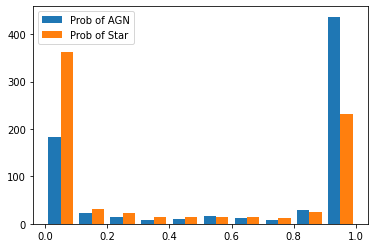

In [96]:
prob_vals = np.exp(logitvals)/(1+np.exp(logitvals))
plt.hist(prob_vals, bins=10)
plt.legend(['Prob of AGN', 'Prob of Star'])

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset

# -----------------------
# 2. Training function
# -----------------------
def evaluate(model, loader, device):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb).argmax(dim=1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    return correct / total


def train_model(base_model_fn, full_train_dataset, test_dataset, epochs=20,
                   batch_size=32, k_folds=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    kfold = KFold(n_splits=k_folds, shuffle=True)

    val_acc_per_fold = []
    models = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(full_train_dataset)):
        print(f"\n--- Fold {fold+1}/{k_folds} ---")
        train_subset = torch.utils.data.Subset(full_train_dataset, train_idx)
        val_subset = torch.utils.data.Subset(full_train_dataset, val_idx)

        train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

        model = base_model_fn().to(device)
        optimizer = optim.Adam(model.parameters(), lr=1e-3)
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            model.train()
            total_loss = 0
            corr_train, total_train = 0, 0
            for xb, yb in train_loader:
                xb, yb = xb.to(device), yb.to(device)
                optimizer.zero_grad()
                out = model(xb)
                loss = criterion(out, yb)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
                # Also print training error
                _, pred = torch.max(out, 1)
                total_train += yb.size(0)
                corr_train += (pred == yb).sum().item()
            acc_train = corr_train/total_train
            avg_loss = total_loss / len(train_loader)

            val_acc = evaluate(model, val_loader, device)
            print(f"Epoch {epoch+1}/{epochs} | Loss={avg_loss:.4f} | Train Acc={acc_train:.4f} | Val Acc={val_acc:.4f}")

        models.append(model)
        val_acc_per_fold.append(val_acc)

    print(f"\nCross-validation results: {val_acc_per_fold}")
    print(f"Mean Val Acc: {np.mean(val_acc_per_fold):.4f} ± {np.std(val_acc_per_fold):.4f}")

    # Pick the best fold’s model
    best_model = models[np.argmax(val_acc_per_fold)]

    # Final test evaluation
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
    test_acc = evaluate(model, test_loader, device)
    print(f"\nHold-out Test Accuracy: {test_acc:.4f}")

    return best_model
# -----------------------
# 3. Pseudo-labeling function
# -----------------------
def get_pseudo_labels(model, unlabeled_loader, threshold=0.95):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    pseudo_X, pseudo_y = [], []
    with torch.no_grad():
        for xb in unlabeled_loader:
            xb = xb[0].to(device)  # DataLoader yields a tuple
            probs = torch.softmax(model(xb), dim=1)
            conf, pred = torch.max(probs, dim=1)
            mask = conf > threshold
            pseudo_X.append(xb[mask].cpu())
            pseudo_y.append(pred[mask].cpu())
    if len(pseudo_X) == 0:
        return None
    pseudo_X = torch.cat(pseudo_X)
    pseudo_y = torch.cat(pseudo_y)
    return TensorDataset(pseudo_X, pseudo_y)


# Define a fresh model function
def make_model():
    return BaselineCNN(num_classes=2)

In [59]:
len(test_ds)

457

In [90]:
test_model = make_model()
best_test_model = train_model(make_model, train_ds, test_ds)


--- Fold 1/5 ---
Epoch 1/20 | Loss=0.3522 | Train Acc=0.8754 | Val Acc=0.6202
Epoch 2/20 | Loss=0.1502 | Train Acc=0.9569 | Val Acc=0.9235
Epoch 3/20 | Loss=0.1151 | Train Acc=0.9651 | Val Acc=0.8579
Epoch 4/20 | Loss=0.0935 | Train Acc=0.9658 | Val Acc=0.8333
Epoch 5/20 | Loss=0.0803 | Train Acc=0.9747 | Val Acc=0.9426
Epoch 6/20 | Loss=0.0632 | Train Acc=0.9781 | Val Acc=0.9235
Epoch 7/20 | Loss=0.0440 | Train Acc=0.9884 | Val Acc=0.9262
Epoch 8/20 | Loss=0.0278 | Train Acc=0.9932 | Val Acc=0.9344
Epoch 9/20 | Loss=0.0186 | Train Acc=0.9973 | Val Acc=0.8880
Epoch 10/20 | Loss=0.0142 | Train Acc=0.9979 | Val Acc=0.9344
Epoch 11/20 | Loss=0.0119 | Train Acc=0.9979 | Val Acc=0.9290
Epoch 12/20 | Loss=0.0123 | Train Acc=0.9973 | Val Acc=0.8907
Epoch 13/20 | Loss=0.0051 | Train Acc=1.0000 | Val Acc=0.9399
Epoch 14/20 | Loss=0.0036 | Train Acc=1.0000 | Val Acc=0.9317
Epoch 15/20 | Loss=0.0028 | Train Acc=1.0000 | Val Acc=0.9317
Epoch 16/20 | Loss=0.0040 | Train Acc=1.0000 | Val Acc=0.9208

In [97]:
from torch.utils.data import ConcatDataset

def iterative_pseudo_labeling(base_model_fn, train_dataset, val_dataset,
                              unlabeled_dataset, batch_size=32, threshold=0.95,
                              max_iters=10, epochs_per_iter=20):
    """
    base_model_fn: function that returns a fresh model (BaselineCNN).
    train_dataset: labeled dataset (TensorDataset).
    val_loader: DataLoader for validation set.
    unlabeled_dataset: TensorDataset with (X,) unlabeled samples.
    """

    # Keep track of remaining unlabeled pool
    unlabeled_loader = DataLoader(unlabeled_dataset, batch_size=batch_size,
                                  shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    current_train_dataset = train_dataset
    iteration = 0
    all_models = []

    while iteration < max_iters:
        print(f"\n=== Iteration {iteration+1}/{max_iters} ===")
        model = base_model_fn
        #train_loader = DataLoader(current_train_dataset, batch_size=batch_size, shuffle=True)

        # Train on current training set
        model = train_model(model, current_train_dataset, val_dataset, epochs=epochs_per_iter)

        # Get pseudo-labels from remaining unlabeled pool
        pseudo_dataset = get_pseudo_labels(model, unlabeled_loader, threshold=threshold)

        if pseudo_dataset is None or len(pseudo_dataset) == 0:
            print("No confident pseudo-labels found. Stopping.")
            break

        print(f"Added {len(pseudo_dataset)} pseudo-labeled samples.")

        # Update training set
        current_train_dataset = ConcatDataset([current_train_dataset, pseudo_dataset])
        print(f"Current training dataset has {len(current_train_dataset)} samples")

        # Remove used pseudo-samples from unlabeled pool
        used_indices = set()
        model.eval()
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        with torch.no_grad():
            new_unlabeled = []
            for xb in unlabeled_loader:
                xb = xb[0].to(device)
                probs = torch.softmax(model(xb), dim=1)
                conf, _ = torch.max(probs, dim=1)
                mask = conf <= threshold  # keep only low-confidence
                if mask.sum() > 0:
                    new_unlabeled.append(xb[mask].cpu())
        if len(new_unlabeled) == 0:
            print("All unlabeled samples consumed. Stopping.")
            break
        X_new = torch.cat(new_unlabeled)
        unlabeled_dataset = TensorDataset(X_new)
        unlabeled_loader = DataLoader(unlabeled_dataset, batch_size=batch_size, shuffle=False)

        all_models.append(model)
        iteration += 1

    return model, all_models

In [108]:


# Run iterative pseudo-labeling
final_model, all_models = iterative_pseudo_labeling(
    base_model_fn=make_model,
    train_dataset=train_ds,   # your original labeled dataset
    val_dataset=test_ds,
    unlabeled_dataset=unlabelled_dataset,  # your unlabeled spectra as TensorDataset(X_unlabeled,)
    batch_size=32,
    threshold=0.95,
    max_iters=10,
    epochs_per_iter=20
)


=== Iteration 1/10 ===

--- Fold 1/5 ---
Epoch 1/20 | Loss=0.4218 | Train Acc=0.8439 | Val Acc=0.5792
Epoch 2/20 | Loss=0.1824 | Train Acc=0.9459 | Val Acc=0.9426
Epoch 3/20 | Loss=0.1356 | Train Acc=0.9596 | Val Acc=0.9344
Epoch 4/20 | Loss=0.1100 | Train Acc=0.9733 | Val Acc=0.9399
Epoch 5/20 | Loss=0.0975 | Train Acc=0.9685 | Val Acc=0.6339
Epoch 6/20 | Loss=0.0821 | Train Acc=0.9747 | Val Acc=0.9262
Epoch 7/20 | Loss=0.0504 | Train Acc=0.9890 | Val Acc=0.9399
Epoch 8/20 | Loss=0.0405 | Train Acc=0.9897 | Val Acc=0.9098
Epoch 9/20 | Loss=0.0327 | Train Acc=0.9911 | Val Acc=0.9399
Epoch 10/20 | Loss=0.0220 | Train Acc=0.9952 | Val Acc=0.9208
Epoch 11/20 | Loss=0.0209 | Train Acc=0.9959 | Val Acc=0.9071
Epoch 12/20 | Loss=0.0260 | Train Acc=0.9897 | Val Acc=0.8142
Epoch 13/20 | Loss=0.0137 | Train Acc=0.9986 | Val Acc=0.9262
Epoch 14/20 | Loss=0.0100 | Train Acc=0.9986 | Val Acc=0.9344
Epoch 15/20 | Loss=0.0068 | Train Acc=0.9993 | Val Acc=0.9344
Epoch 16/20 | Loss=0.0062 | Train Acc

Epoch 7/20 | Loss=0.0132 | Train Acc=0.9957 | Val Acc=0.9853
Epoch 8/20 | Loss=0.0119 | Train Acc=0.9961 | Val Acc=0.9834
Epoch 9/20 | Loss=0.0097 | Train Acc=0.9966 | Val Acc=0.8978
Epoch 10/20 | Loss=0.0087 | Train Acc=0.9969 | Val Acc=0.9839
Epoch 11/20 | Loss=0.0069 | Train Acc=0.9974 | Val Acc=0.9880
Epoch 12/20 | Loss=0.0068 | Train Acc=0.9981 | Val Acc=0.9851
Epoch 13/20 | Loss=0.0070 | Train Acc=0.9976 | Val Acc=0.9775
Epoch 14/20 | Loss=0.0044 | Train Acc=0.9984 | Val Acc=0.9833
Epoch 15/20 | Loss=0.0059 | Train Acc=0.9978 | Val Acc=0.9850
Epoch 16/20 | Loss=0.0056 | Train Acc=0.9982 | Val Acc=0.9869
Epoch 17/20 | Loss=0.0047 | Train Acc=0.9983 | Val Acc=0.9852
Epoch 18/20 | Loss=0.0048 | Train Acc=0.9982 | Val Acc=0.9863
Epoch 19/20 | Loss=0.0035 | Train Acc=0.9987 | Val Acc=0.9805
Epoch 20/20 | Loss=0.0040 | Train Acc=0.9985 | Val Acc=0.9784

--- Fold 3/5 ---
Epoch 1/20 | Loss=0.0709 | Train Acc=0.9761 | Val Acc=0.9862
Epoch 2/20 | Loss=0.0425 | Train Acc=0.9856 | Val Acc=0.

Epoch 14/20 | Loss=0.0136 | Train Acc=0.9954 | Val Acc=0.9788
Epoch 15/20 | Loss=0.0143 | Train Acc=0.9949 | Val Acc=0.7939
Epoch 16/20 | Loss=0.0135 | Train Acc=0.9953 | Val Acc=0.9753
Epoch 17/20 | Loss=0.0105 | Train Acc=0.9962 | Val Acc=0.9817
Epoch 18/20 | Loss=0.0095 | Train Acc=0.9966 | Val Acc=0.9761
Epoch 19/20 | Loss=0.0099 | Train Acc=0.9965 | Val Acc=0.9806
Epoch 20/20 | Loss=0.0095 | Train Acc=0.9969 | Val Acc=0.9798

--- Fold 4/5 ---
Epoch 1/20 | Loss=0.0927 | Train Acc=0.9665 | Val Acc=0.9513
Epoch 2/20 | Loss=0.0577 | Train Acc=0.9782 | Val Acc=0.9743
Epoch 3/20 | Loss=0.0487 | Train Acc=0.9819 | Val Acc=0.9532
Epoch 4/20 | Loss=0.0412 | Train Acc=0.9851 | Val Acc=0.9802
Epoch 5/20 | Loss=0.0356 | Train Acc=0.9875 | Val Acc=0.9766
Epoch 6/20 | Loss=0.0321 | Train Acc=0.9881 | Val Acc=0.8977
Epoch 7/20 | Loss=0.0298 | Train Acc=0.9897 | Val Acc=0.9786
Epoch 8/20 | Loss=0.0250 | Train Acc=0.9914 | Val Acc=0.9663
Epoch 9/20 | Loss=0.0240 | Train Acc=0.9914 | Val Acc=0.9716

Epoch 1/20 | Loss=0.1405 | Train Acc=0.9570 | Val Acc=0.9692
Epoch 2/20 | Loss=0.0654 | Train Acc=0.9760 | Val Acc=0.9159
Epoch 3/20 | Loss=0.0519 | Train Acc=0.9810 | Val Acc=0.9691
Epoch 4/20 | Loss=0.0449 | Train Acc=0.9837 | Val Acc=0.9741
Epoch 5/20 | Loss=0.0401 | Train Acc=0.9852 | Val Acc=0.9633
Epoch 6/20 | Loss=0.0350 | Train Acc=0.9865 | Val Acc=0.9464
Epoch 7/20 | Loss=0.0328 | Train Acc=0.9878 | Val Acc=0.9793
Epoch 8/20 | Loss=0.0292 | Train Acc=0.9897 | Val Acc=0.8690
Epoch 9/20 | Loss=0.0249 | Train Acc=0.9912 | Val Acc=0.9731
Epoch 10/20 | Loss=0.0243 | Train Acc=0.9911 | Val Acc=0.9723
Epoch 11/20 | Loss=0.0209 | Train Acc=0.9925 | Val Acc=0.9570
Epoch 12/20 | Loss=0.0182 | Train Acc=0.9942 | Val Acc=0.9625
Epoch 13/20 | Loss=0.0173 | Train Acc=0.9942 | Val Acc=0.9099
Epoch 14/20 | Loss=0.0155 | Train Acc=0.9953 | Val Acc=0.9576
Epoch 15/20 | Loss=0.0145 | Train Acc=0.9951 | Val Acc=0.9409
Epoch 16/20 | Loss=0.0109 | Train Acc=0.9968 | Val Acc=0.9664
Epoch 17/20 | Los

Epoch 3/20 | Loss=0.0555 | Train Acc=0.9781 | Val Acc=0.9516
Epoch 4/20 | Loss=0.0495 | Train Acc=0.9811 | Val Acc=0.9724
Epoch 5/20 | Loss=0.0452 | Train Acc=0.9827 | Val Acc=0.9664
Epoch 6/20 | Loss=0.0416 | Train Acc=0.9844 | Val Acc=0.9679
Epoch 7/20 | Loss=0.0382 | Train Acc=0.9861 | Val Acc=0.9656
Epoch 8/20 | Loss=0.0335 | Train Acc=0.9874 | Val Acc=0.9753
Epoch 9/20 | Loss=0.0318 | Train Acc=0.9871 | Val Acc=0.9693
Epoch 10/20 | Loss=0.0287 | Train Acc=0.9891 | Val Acc=0.9683
Epoch 11/20 | Loss=0.0251 | Train Acc=0.9907 | Val Acc=0.9708
Epoch 12/20 | Loss=0.0232 | Train Acc=0.9917 | Val Acc=0.9754
Epoch 13/20 | Loss=0.0199 | Train Acc=0.9929 | Val Acc=0.9751
Epoch 14/20 | Loss=0.0231 | Train Acc=0.9913 | Val Acc=0.9748
Epoch 15/20 | Loss=0.0160 | Train Acc=0.9942 | Val Acc=0.9541
Epoch 16/20 | Loss=0.0156 | Train Acc=0.9940 | Val Acc=0.9667
Epoch 17/20 | Loss=0.0143 | Train Acc=0.9948 | Val Acc=0.9691
Epoch 18/20 | Loss=0.0116 | Train Acc=0.9957 | Val Acc=0.9634
Epoch 19/20 | L

Epoch 10/20 | Loss=0.0349 | Train Acc=0.9871 | Val Acc=0.9746
Epoch 11/20 | Loss=0.0328 | Train Acc=0.9886 | Val Acc=0.9526
Epoch 12/20 | Loss=0.0288 | Train Acc=0.9898 | Val Acc=0.9504
Epoch 13/20 | Loss=0.0274 | Train Acc=0.9905 | Val Acc=0.9680
Epoch 14/20 | Loss=0.0258 | Train Acc=0.9912 | Val Acc=0.9740
Epoch 15/20 | Loss=0.0246 | Train Acc=0.9909 | Val Acc=0.7194
Epoch 16/20 | Loss=0.0205 | Train Acc=0.9932 | Val Acc=0.9701
Epoch 17/20 | Loss=0.0194 | Train Acc=0.9938 | Val Acc=0.9712
Epoch 18/20 | Loss=0.0184 | Train Acc=0.9940 | Val Acc=0.9724
Epoch 19/20 | Loss=0.0178 | Train Acc=0.9941 | Val Acc=0.9705
Epoch 20/20 | Loss=0.0148 | Train Acc=0.9951 | Val Acc=0.9360

--- Fold 3/5 ---
Epoch 1/20 | Loss=0.1009 | Train Acc=0.9626 | Val Acc=0.9709
Epoch 2/20 | Loss=0.0676 | Train Acc=0.9737 | Val Acc=0.9671
Epoch 3/20 | Loss=0.0592 | Train Acc=0.9770 | Val Acc=0.9734
Epoch 4/20 | Loss=0.0533 | Train Acc=0.9795 | Val Acc=0.9755
Epoch 5/20 | Loss=0.0482 | Train Acc=0.9818 | Val Acc=0.

Epoch 17/20 | Loss=0.0182 | Train Acc=0.9933 | Val Acc=0.9701
Epoch 18/20 | Loss=0.0155 | Train Acc=0.9942 | Val Acc=0.9746
Epoch 19/20 | Loss=0.0161 | Train Acc=0.9941 | Val Acc=0.9585
Epoch 20/20 | Loss=0.0148 | Train Acc=0.9941 | Val Acc=0.9698

--- Fold 4/5 ---
Epoch 1/20 | Loss=0.1041 | Train Acc=0.9612 | Val Acc=0.9667
Epoch 2/20 | Loss=0.0686 | Train Acc=0.9732 | Val Acc=0.9667
Epoch 3/20 | Loss=0.0582 | Train Acc=0.9778 | Val Acc=0.9724
Epoch 4/20 | Loss=0.0523 | Train Acc=0.9801 | Val Acc=0.9762
Epoch 5/20 | Loss=0.0482 | Train Acc=0.9813 | Val Acc=0.9749
Epoch 6/20 | Loss=0.0443 | Train Acc=0.9825 | Val Acc=0.9759
Epoch 7/20 | Loss=0.0403 | Train Acc=0.9850 | Val Acc=0.9740
Epoch 8/20 | Loss=0.0355 | Train Acc=0.9865 | Val Acc=0.9706
Epoch 9/20 | Loss=0.0323 | Train Acc=0.9881 | Val Acc=0.9727
Epoch 10/20 | Loss=0.0301 | Train Acc=0.9892 | Val Acc=0.9705
Epoch 11/20 | Loss=0.0270 | Train Acc=0.9901 | Val Acc=0.9595
Epoch 12/20 | Loss=0.0243 | Train Acc=0.9912 | Val Acc=0.9746

Epoch 4/20 | Loss=0.0565 | Train Acc=0.9784 | Val Acc=0.9090
Epoch 5/20 | Loss=0.0516 | Train Acc=0.9798 | Val Acc=0.9766
Epoch 6/20 | Loss=0.0463 | Train Acc=0.9828 | Val Acc=0.9624
Epoch 7/20 | Loss=0.0410 | Train Acc=0.9846 | Val Acc=0.9745
Epoch 8/20 | Loss=0.0384 | Train Acc=0.9859 | Val Acc=0.9542
Epoch 9/20 | Loss=0.0335 | Train Acc=0.9881 | Val Acc=0.9124
Epoch 10/20 | Loss=0.0313 | Train Acc=0.9886 | Val Acc=0.9726
Epoch 11/20 | Loss=0.0292 | Train Acc=0.9898 | Val Acc=0.9570
Epoch 12/20 | Loss=0.0264 | Train Acc=0.9904 | Val Acc=0.9626
Epoch 13/20 | Loss=0.0240 | Train Acc=0.9915 | Val Acc=0.9740
Epoch 14/20 | Loss=0.0216 | Train Acc=0.9924 | Val Acc=0.9019
Epoch 15/20 | Loss=0.0207 | Train Acc=0.9926 | Val Acc=0.9321
Epoch 16/20 | Loss=0.0176 | Train Acc=0.9941 | Val Acc=0.9613
Epoch 17/20 | Loss=0.0173 | Train Acc=0.9940 | Val Acc=0.9642
Epoch 18/20 | Loss=0.0149 | Train Acc=0.9949 | Val Acc=0.9765
Epoch 19/20 | Loss=0.0141 | Train Acc=0.9949 | Val Acc=0.9723
Epoch 20/20 | 

In [93]:
kfold.split(train_ds)

TypeError: split() missing 1 required positional argument: 'y'

In [ ]:
# Run iterative pseudo-labeling
final_model2, all_models2 = iterative_pseudo_labeling(
    base_model_fn=make_model,
    train_dataset=train_ds,   # your original labeled dataset
    val_dataset=test_ds,
    unlabeled_dataset=unlabelled_dataset,  # your unlabeled spectra as TensorDataset(X_unlabeled,)
    batch_size=32,
    threshold=0.70,
    max_iters=10,
    epochs_per_iter=20
)


=== Iteration 1/10 ===

--- Fold 1/5 ---
Epoch 1/20 | Loss=0.4138 | Train Acc=0.8364 | Val Acc=0.5902
Epoch 2/20 | Loss=0.2021 | Train Acc=0.9439 | Val Acc=0.9016
Epoch 3/20 | Loss=0.1578 | Train Acc=0.9507 | Val Acc=0.9317
Epoch 4/20 | Loss=0.1402 | Train Acc=0.9541 | Val Acc=0.9262
Epoch 5/20 | Loss=0.0993 | Train Acc=0.9692 | Val Acc=0.9235
Epoch 6/20 | Loss=0.0713 | Train Acc=0.9788 | Val Acc=0.9290
Epoch 7/20 | Loss=0.0538 | Train Acc=0.9843 | Val Acc=0.8852
Epoch 8/20 | Loss=0.0392 | Train Acc=0.9904 | Val Acc=0.9262
Epoch 9/20 | Loss=0.0267 | Train Acc=0.9959 | Val Acc=0.6311
Epoch 10/20 | Loss=0.0234 | Train Acc=0.9959 | Val Acc=0.8962
Epoch 11/20 | Loss=0.0186 | Train Acc=0.9973 | Val Acc=0.9262
Epoch 12/20 | Loss=0.0353 | Train Acc=0.9897 | Val Acc=0.9153
Epoch 13/20 | Loss=0.0147 | Train Acc=0.9979 | Val Acc=0.8907
Epoch 14/20 | Loss=0.0087 | Train Acc=0.9986 | Val Acc=0.9153
Epoch 15/20 | Loss=0.0058 | Train Acc=1.0000 | Val Acc=0.9180
Epoch 16/20 | Loss=0.0056 | Train Acc

Epoch 7/20 | Loss=0.0568 | Train Acc=0.9783 | Val Acc=0.9579
Epoch 8/20 | Loss=0.0530 | Train Acc=0.9795 | Val Acc=0.9672
Epoch 9/20 | Loss=0.0476 | Train Acc=0.9820 | Val Acc=0.9698
Epoch 10/20 | Loss=0.0462 | Train Acc=0.9821 | Val Acc=0.9636
Epoch 11/20 | Loss=0.0424 | Train Acc=0.9833 | Val Acc=0.9684
Epoch 12/20 | Loss=0.0389 | Train Acc=0.9854 | Val Acc=0.9329
Epoch 13/20 | Loss=0.0352 | Train Acc=0.9869 | Val Acc=0.9675
Epoch 14/20 | Loss=0.0329 | Train Acc=0.9874 | Val Acc=0.9660
Epoch 15/20 | Loss=0.0288 | Train Acc=0.9891 | Val Acc=0.9674
Epoch 16/20 | Loss=0.0273 | Train Acc=0.9898 | Val Acc=0.9624
Epoch 17/20 | Loss=0.0272 | Train Acc=0.9898 | Val Acc=0.9344
Epoch 18/20 | Loss=0.0227 | Train Acc=0.9916 | Val Acc=0.9506
Epoch 19/20 | Loss=0.0227 | Train Acc=0.9914 | Val Acc=0.9681
Epoch 20/20 | Loss=0.0212 | Train Acc=0.9923 | Val Acc=0.9613

--- Fold 3/5 ---
Epoch 1/20 | Loss=0.1380 | Train Acc=0.9500 | Val Acc=0.9537
Epoch 2/20 | Loss=0.0957 | Train Acc=0.9628 | Val Acc=0.

In [ ]:
# Run iterative pseudo-labeling
final_model2, all_models2 = iterative_pseudo_labeling(
    base_model_fn=make_model,
    train_dataset=train_ds,   # your original labeled dataset
    val_dataset=test_ds,
    unlabeled_dataset=unlabelled_dataset,  # your unlabeled spectra as TensorDataset(X_unlabeled,)
    batch_size=32,
    threshold=0.99,
    max_iters=10,
    epochs_per_iter=20
)